In [91]:
import numpy as np
import matplotlib.pyplot as plt
import os


In [92]:
# Global variables
EXTRACTOR_NAMES = ['DinoFeatureExtractor','DiftFeatureExtractor']
SCENE_NAMES = ['chair','drums','ficus','hotdog','lego','materials','mic','ship']
PATH = 'plot_data/global_cosine_similarity'

In [97]:
def plot(feat_differences_list,camera_differences_list, name_list,scene_name):
    # Plot the results
    plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
    number_of_experiments = len(feat_differences_list)
    for exp_number in range(number_of_experiments):
        plt.scatter(camera_differences_list[exp_number],
                    feat_differences_list[exp_number], 
                    label=name_list[exp_number],
                    alpha=0.7, edgecolors='black', marker='o')
    plt.legend(loc='lower right', fontsize=10)
    plt.xlabel("Camera Similarity", fontsize=12)
    plt.ylabel("Feature Similarity", fontsize=12)
    # plt.ylim(0, 1)
    plt.title(f"{scene_name} camera vs features", fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()  # Ensures the labels fit within the figure area
    plt.show()
    
def load(model_name,scene_name_root,model_size=None):
    local_path = os.path.join(PATH,model_name)
    scene_name = scene_name_root
    if model_name == "DinoFeatureExtractor":
        scene_name = f"{model_size}/{model_size}_dino_{scene_name_root}_features"
    filename_camera = os.path.join(local_path,f"{scene_name}_camera.npy")
    filename_feat = os.path.join(local_path,f"{scene_name}_feat.npy")
    return np.load(filename_camera), np.load(filename_feat)

In [ ]:
all_camera_differences_list = []
all_feat_differences_list = []
for scene_name_root in SCENE_NAMES:
    feat_differences_list = []
    camera_differences_list = []
    name_list = []
    for model_name in EXTRACTOR_NAMES:
        if model_name == "DinoFeatureExtractor":
            for model_size in ["small","big"]:
                camera, feat = load(model_name,scene_name_root,model_size)
                feat_differences_list.append(feat)
                camera_differences_list.append(camera)
                name_list.append(f"{model_name} {model_size}")
        else:
            camera, feat = load(model_name,scene_name_root)
            feat_differences_list.append(feat)
            camera_differences_list.append(camera)
            name_list.append(f"{model_name}")
    plot(feat_differences_list,camera_differences_list, name_list,scene_name_root)
    all_camera_differences_list.append(camera_differences_list)
    all_feat_differences_list.append(feat_differences_list)

In [95]:
c_sorted = []
feat_sorted = []
for idx,c_diff in enumerate(all_camera_differences_list):
    idx_sort = np.argsort(c_diff,axis=-1)
    c_diff = np.take_along_axis(np.array(c_diff),idx_sort,axis=-1)
    f_diff = np.take_along_axis(np.array(all_feat_differences_list[idx]),idx_sort,axis=-1)
    c_sorted.append(c_diff)
    feat_sorted.append(f_diff)
    
c_sorted = np.array(c_sorted)
feat_sorted = np.array(feat_sorted)

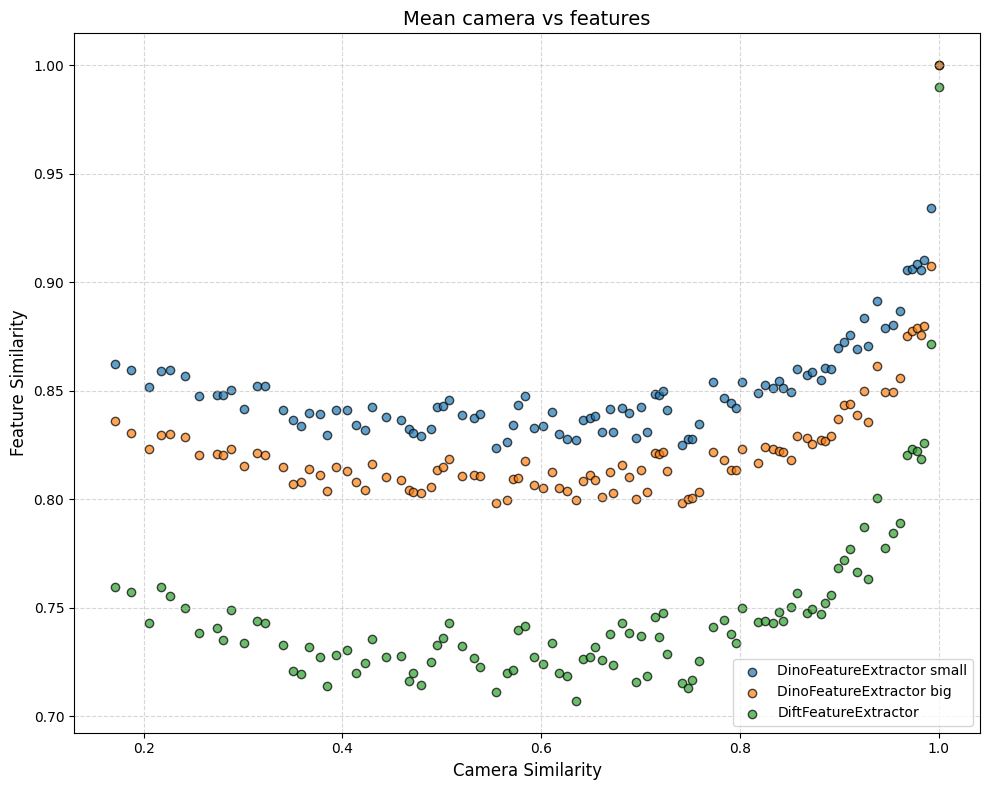

In [98]:
plot(np.mean(feat_sorted,axis=0),np.mean(c_sorted,axis=0),name_list,'Mean')